In [38]:
#ensure cuda is working
import torch
assert torch.cuda.is_available()
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
NVIDIA RTX A4500


In [39]:
import mira

import anndata
import scanpy as sc
import numpy as np
import pandas as pd
import scvelo as scv

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import matplotlib
import matplotlib as mpl
from copy import copy
reds = copy(mpl.cm.Reds)
reds.set_under("lightgray")

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k * h)[:3]) * 255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

plotly_reds = matplotlib_to_plotly(reds, 255)
plotly_reds[0] = [0.0, 'rgb(211, 211, 211)']

import plotly.express as px
from dash import Dash, dcc, html, Input, Output

import os
import sys
from pathlib import Path
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"

project_directory = '/Cranio_Lab/Louk_Seton/mesenchyme_project_2023'
os.chdir(os.path.expanduser("~")+project_directory)

In [3]:
# ecto_e8 = sc.read('anndata_objects/adata_E8_ecto_annotated.h5ad')
# ecto_e9 = sc.read('anndata_objects/adata_E9_ecto_annotated.h5ad')
# ecto_e10 = sc.read('anndata_objects/adata_E10_ecto_annotated.h5ad')
# ecto_e11 = sc.read('anndata_objects/adata_E11_ecto_annotated.h5ad')
# ecto_e12 = sc.read('anndata_objects/adata_E12_ecto_annotated.h5ad')
# ecto_e13 = sc.read('anndata_objects/adata_E13_ecto_annotated.h5ad')
# ecto_e14 = sc.read('anndata_objects/adata_E14_ecto_annotated.h5ad')

In [4]:
# import anndata as ad
# adata_combined = ad.concat([ecto_e8, ecto_e9,ecto_e10,ecto_e11,ecto_e12,ecto_e13,ecto_e14],join='outer')
# adata_combined.write('anndata_objects/adata_ecto_combined.h5ad')

In [43]:
adata = sc.read('anndata_objects/adata_ecto_mira_20_8_2024.h5ad')

In [7]:
adata.obs['annotation_test'] = list(adata.obs['E8_ecto_annotation_coarse'])
adata.obs['annotation_test'].fillna(adata.obs['E9_ecto_annotation_coarse'],inplace=True)
adata.obs['annotation_test'].fillna(adata.obs['E10_ecto_annotation_coarse'],inplace=True)
adata.obs['annotation_test'].fillna(adata.obs['E11_ecto_annotation_coarse'],inplace=True)
adata.obs['annotation_test'].fillna(adata.obs['E12_ecto_annotation_coarse'],inplace=True)
adata.obs['annotation_test'].fillna(adata.obs['E13_ecto_annotation_coarse'],inplace=True)
adata.obs['annotation_test'].fillna(adata.obs['E14_ecto_annotation_coarse'],inplace=True)
adata.obs['annotation_test'] = adata.obs['annotation_test'].astype('category')
adata.obs['annotation_test']

Index
AAACGGCTCTGACA.E8_10x21                  Surface Ectoderm
AAAGACGATGCTAG.E8_10x21                     Endo - Remove
AAAGATCTAAGGCG.E8_10x21                     Endo - Remove
AAAGGCCTATCGAC.E8_10x21                  Cardiac - Remove
AAATCATGGCTATG.E8_10x21                Ectodermal Placode
                                        ...              
TTTCATGAGCAACCAG.14                  Neuronal Progenitors
TTTCCTCAGTTACGAA.14              Non-neuronal Progenitors
TTTGATCAGCAACCAG.14        Committed Neuronal Progenitors
TTTGGTTCAGGACGAT.14        Pharyngeal Epithelium - Remove
TTTGTTGTCGTTACCC.14              Non-neuronal Progenitors
Name: annotation_test, Length: 6405, dtype: category
Categories (35, object): ['Adenohypo - Remove', 'Cardiac - Remove', 'Committed Neuronal Progenitors', 'Conjunctival Epithelium', ..., 'Surface Ectoderm - Gjb6', 'Ventral Olfactory Epithelium', 'Vomeronasal Organ', 'Whiskers - Ecto']

In [9]:
with open('anndata_objects/adata_ecto_barcodes_filt.txt') as file:
    barcode_list = [line.rstrip() for line in file]
adata = adata[barcode_list].copy() #keep only cells in barcode list

In [10]:
#adata = adata[~adata.obs['annotation_test'].str.contains('emove')].copy() #remove bad cells
adata = adata[~adata.obs['annotation_test'].str.contains('Conjunc')].copy() #remove bad cells
adata

AnnData object with n_obs × n_vars = 5514 × 22912
    obs: 'Clusters', '_X', '_Y', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'sample', 'barcode', 'batch', 'doublet_score', 'predicted_doublets', 'predicted_doublets_based_on_10x_chromium_spec', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'pct_counts_unspliced', 'pred_doubl_cat', 'stage', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_ecto', 'E8_ecto_annotation_coarse', 'leiden_default', 'E9_ecto_annotation_coarse', 'reso_for_ecto', 'leiden_ecto_tmp', 'E10_ecto_annotation_coarse', 'leiden_ecto_fine', 'leiden_ecto_extra_fine', 'leiden_ecto1', 'E11_ecto_annotation_coarse', 'E11_ecto_annotation_fine', 'leiden_neuron', 'E12_ecto_annotation_coarse', 'E12_ecto_annotation_fine', 'leiden_coarse', 'E13_ecto_annotation_coarse', 'E13_ecto_annotation_fine', 'E14_ecto_annotation_coarse', 'E14_ecto_annotation_fine', 'annotation_te

In [11]:
adata.X = adata.layers['original_counts'].copy()

In [12]:
sc.pp.filter_genes(adata, min_cells=15)

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [14]:
sc.pp.highly_variable_genes(adata, min_disp = 0.5, batch_key = 'batch')

In [15]:
adata.var['highly_variable'].value_counts()

highly_variable
False    15579
True      1580
Name: count, dtype: int64

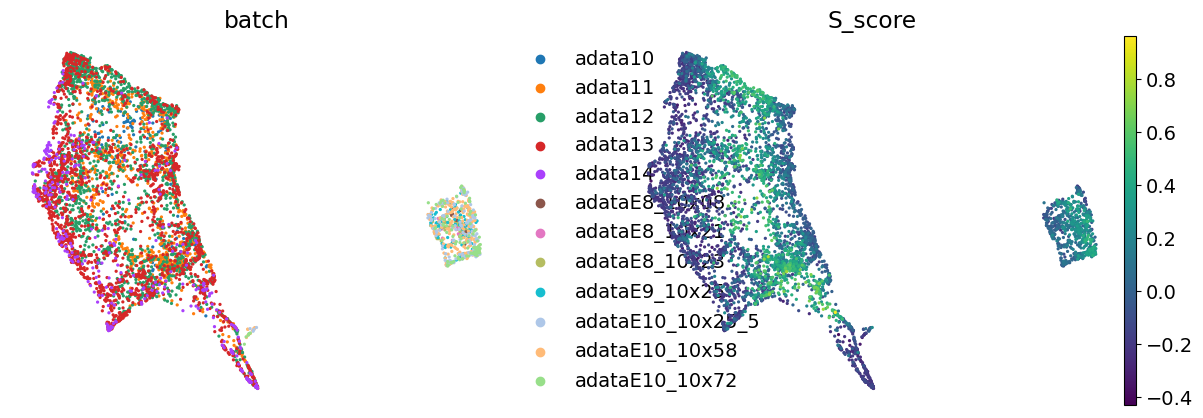

In [16]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=6)
sc.tl.umap(adata, min_dist = 0.2, negative_sample_rate=0.2)
sc.pl.umap(adata, color = ['batch','S_score'], frameon=False)

In [17]:
##mira stuff
model = mira.topics.make_model(
    adata.n_obs, adata.n_vars, # helps MIRA choose reasonable values for some hyperparameters which are not tuned.
    feature_type = 'expression',
    highly_variable_key='highly_variable',
    counts_layer='original_counts',
    categorical_covariates='batch',
    continuous_covariates= ['S_score','G2M_score'],
)

In [18]:
model.get_learning_rate_bounds(adata)

INFO:mira.adata_interface.topic_model:Predicting expression from genes from col: highly_variable


Gathering dataset statistics:   0%|          | 0/5514 [00:00<?, ?it/s]

Learning rate range test:   0%|          | 0/98 [00:00<?, ?it/s]

INFO:mira.topic_model.base:Set learning rates to: (0.015889124130294655, 0.41684469991656503)


(0.015889124130294655, 0.41684469991656503)

<Axes: xlabel='Learning Rate', ylabel='Loss'>

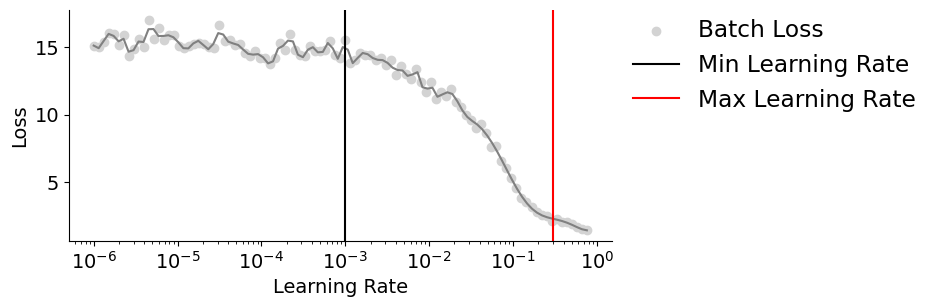

In [19]:
model.set_learning_rates(1e-3, 0.3) # for larger datasets, the default of 1e-3, 0.1 usually works well.
model.plot_learning_rate_bounds(figsize=(7,3))

In [20]:
topic_contributions = mira.topics.gradient_tune(model, adata)

Gathering dataset statistics:   0%|          | 0/5514 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/24 [00:00<?, ?it/s]

Predicting latent vars:   0%|          | 0/22 [00:00<?, ?it/s]

<Axes: xlabel='Topic Number', ylabel='Max contribution'>

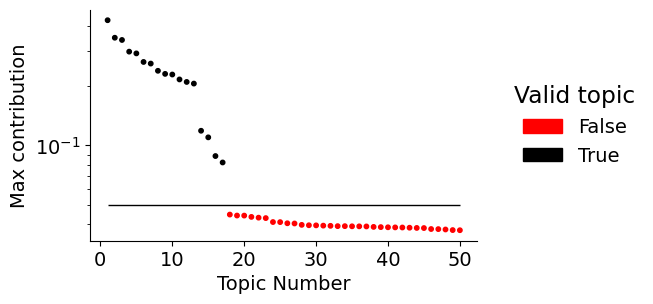

In [31]:
NUM_TOPICS = 17

mira.pl.plot_topic_contributions(topic_contributions, NUM_TOPICS)

In [32]:
NUM_TOPICS = 17
epoch = 80
model.set_learning_rates(1e-3, 0.1) # for larger datasets, the default of 1e-3, 0.1 usually works well.

model = model.set_params(num_topics = NUM_TOPICS,
                                num_epochs = epoch
                        ).fit(adata)


INFO:mira.adata_interface.topic_model:Predicting expression from genes from col: highly_variable


Gathering dataset statistics:   0%|          | 0/5514 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/80 [00:00<?, ?it/s]

INFO:mira.topic_model.base:Moving model to device: cpu


Predicting latent vars:   0%|          | 0/22 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


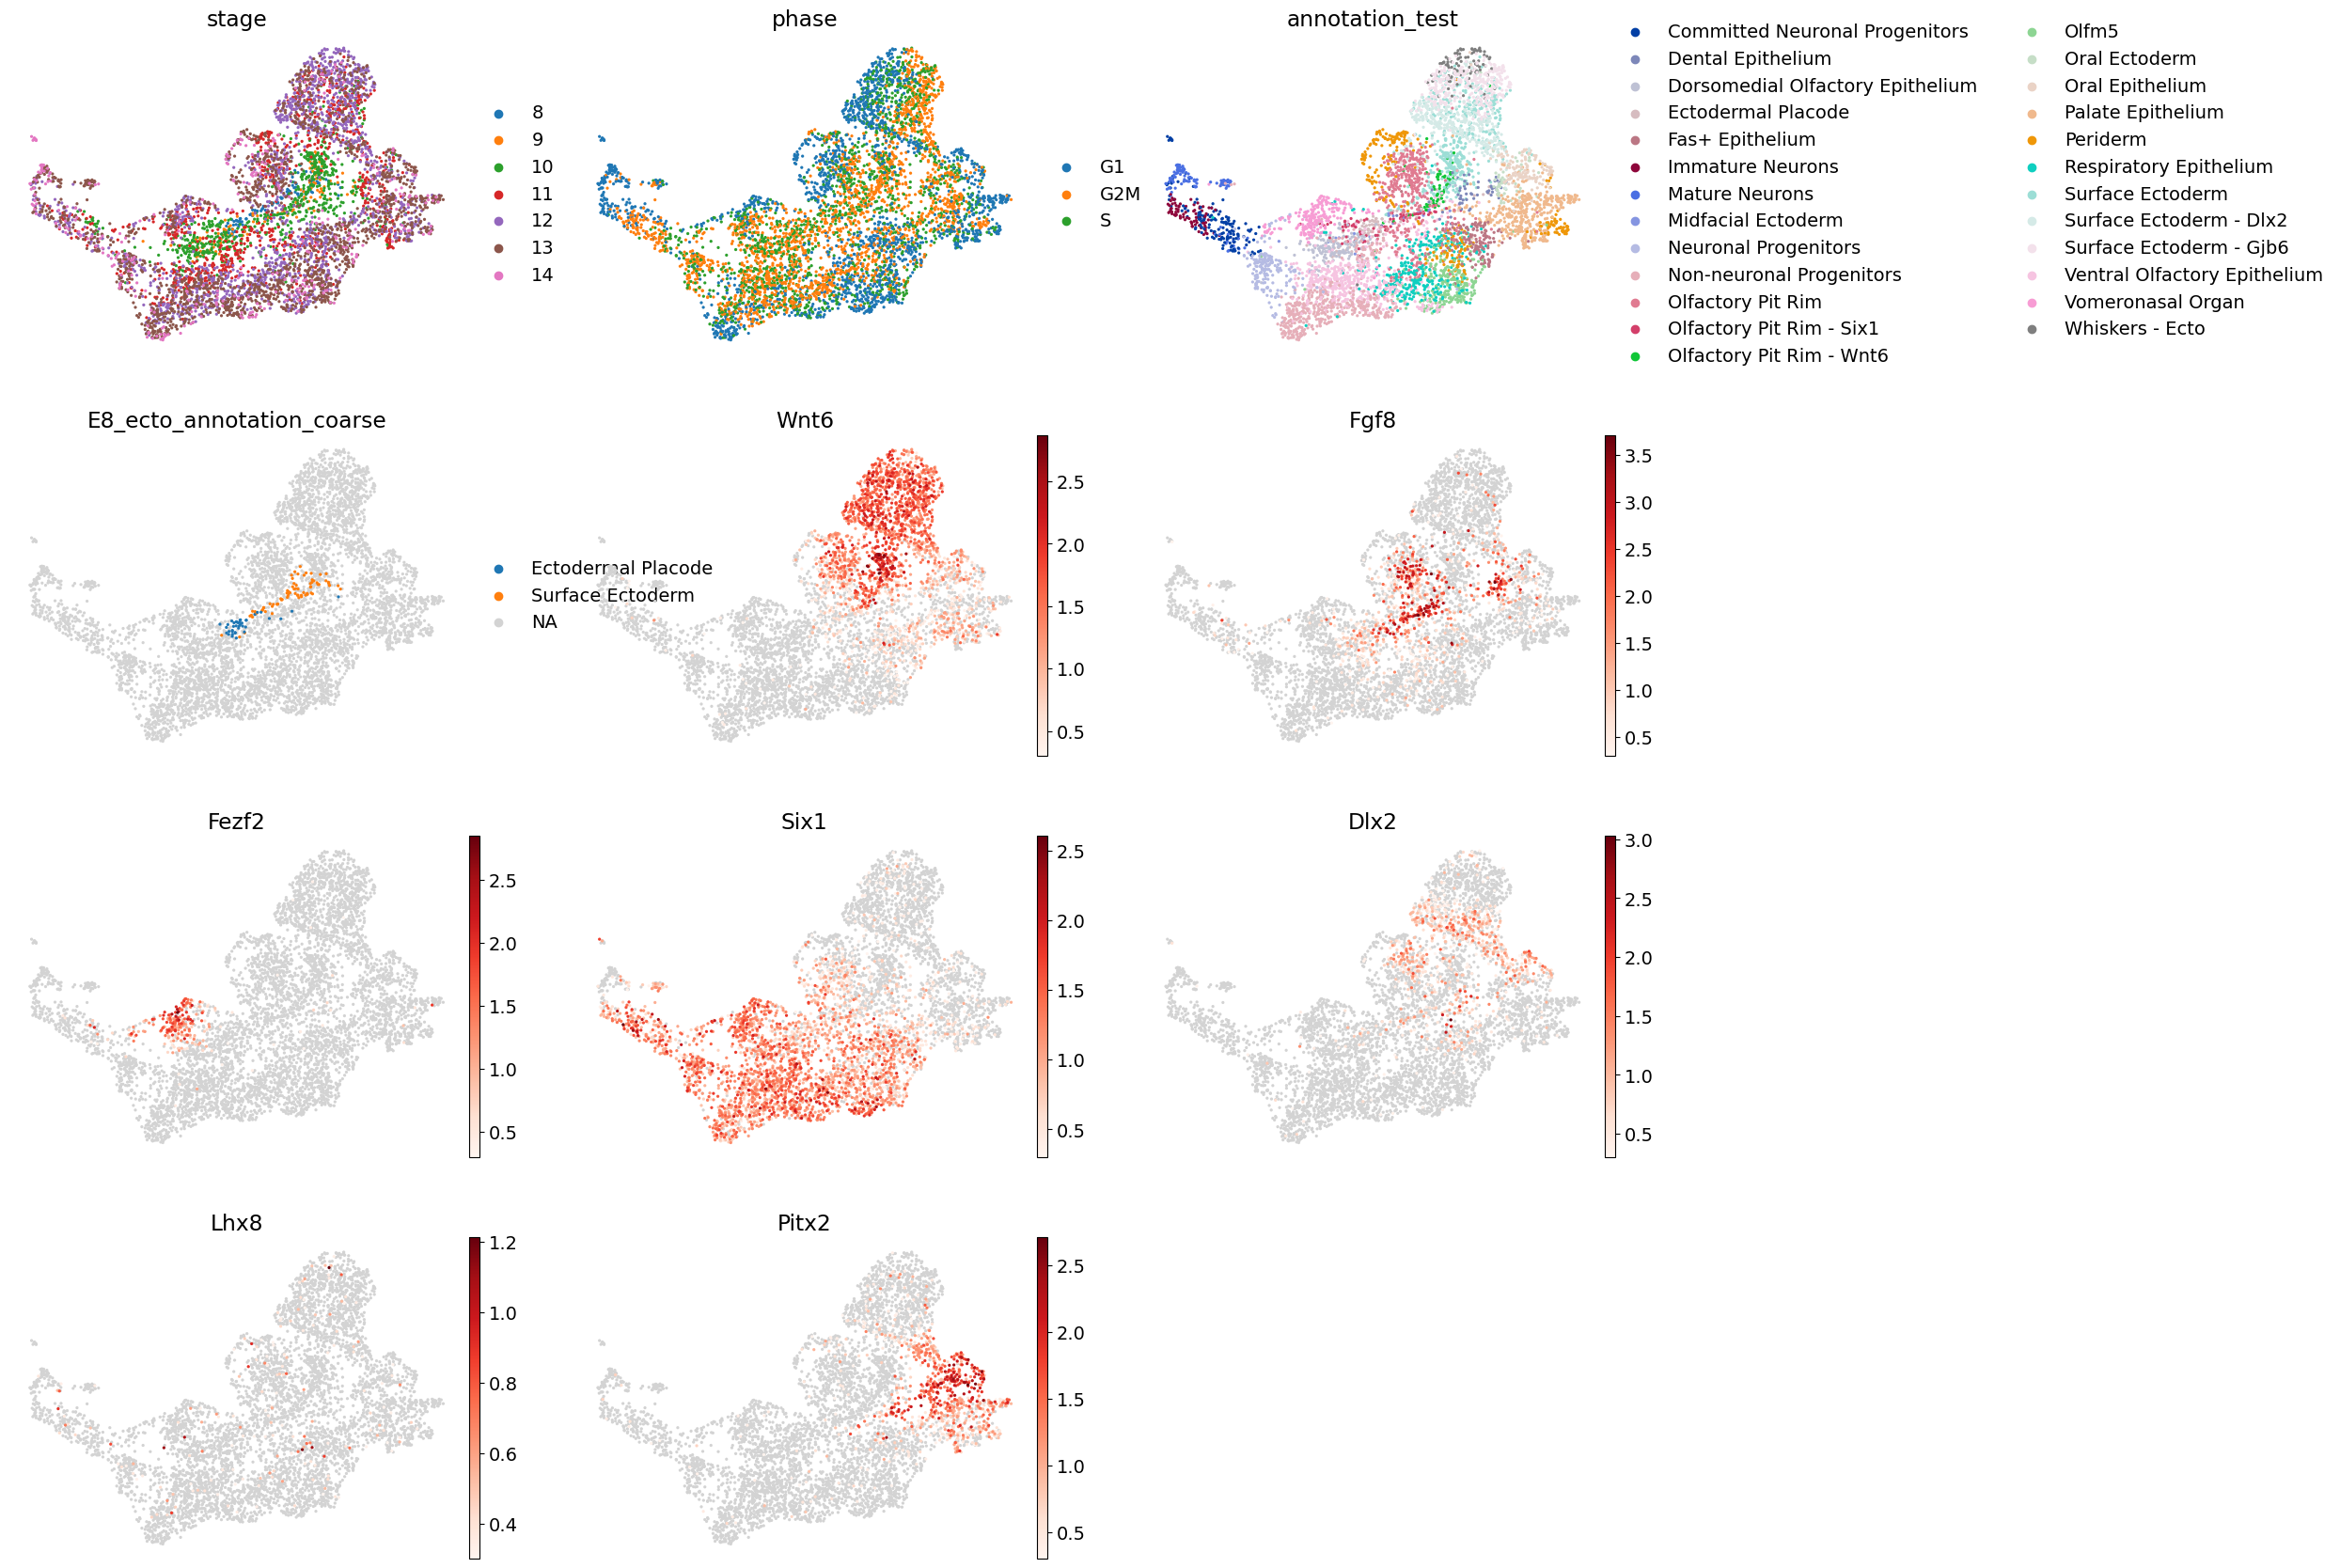

In [33]:
model.predict(adata)
sc.pp.neighbors(adata, use_rep = 'X_umap_features', metric = 'manhattan',n_neighbors=15)
sc.tl.umap(adata)
sc.pl.umap(adata, frameon=False, color = ['stage','phase','annotation_test','E8_ecto_annotation_coarse','Wnt6','Fgf8','Fezf2','Six1','Dlx2','Lhx8','Pitx2',],ncols=3,cmap=reds, vmin=0.3,
          )

In [69]:
adata.write('anndata_objects/adata_ecto_mira_20_8_2024.h5ad')

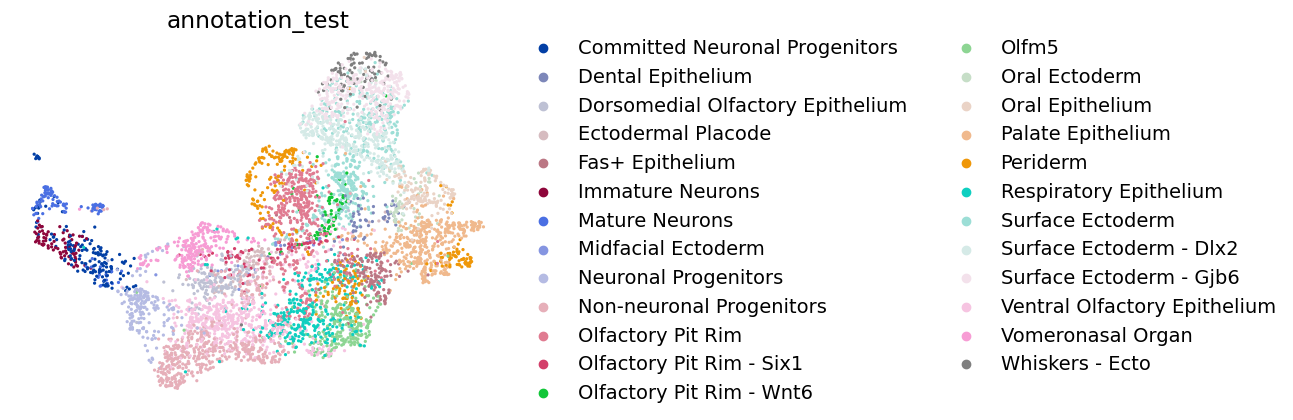

In [34]:
sc.pl.umap(adata, frameon=False, color = ['annotation_test',],ncols=3,cmap=reds, vmin=0.3,
          )